In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#If you are rerunning this cell please make sure to convert the "Date of Travel" column to datetime format from excel.

cab_data = pd.read_csv("/content/drive/MyDrive/DG Internship/Week 2/DataSets-main/Cab_Data.csv")
cab_data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [4]:
#looking at the data types and missing values
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
cab_data["Date of Travel"] = cab_data["Date of Travel"].astype('datetime64')
print(cab_data.info())
cab_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854


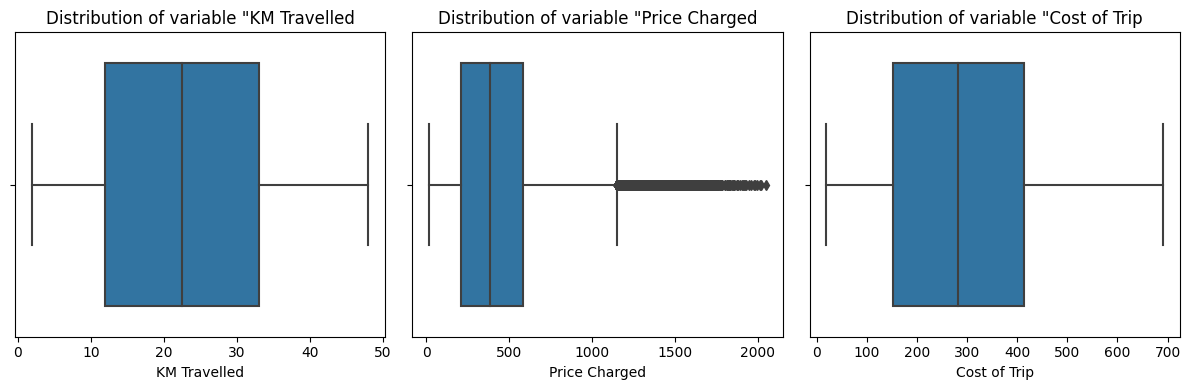

In [6]:
# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create boxplots for each variable
sns.boxplot(x=cab_data['KM Travelled'], ax=axes[0])
sns.boxplot(x=cab_data['Price Charged'], ax=axes[1])
sns.boxplot(x=cab_data['Cost of Trip'], ax=axes[2])

# Set plot titles
axes[0].set_title('Distribution of variable "KM Travelled')
axes[1].set_title('Distribution of variable "Price Charged')
axes[2].set_title('Distribution of variable "Cost of Trip')

# Display the plots
plt.tight_layout()
plt.show()

If we look at the distributions of the above variables, "KM Travelled and "Cost of Trip" look kind of normal but "Price Charged" looks positively skewed and contains many outliers on the high price side. This could be because of the overnight charge or premium cab rides or more long distance trips. We can create a new column which will only contain rides with unusually high charges.

In [7]:
# Calculate the upper whisker value
q3 = cab_data['Price Charged'].quantile(0.75)
iqr = cab_data['Price Charged'].quantile(0.75) - cab_data['Price Charged'].quantile(0.25)
upper_whisker = q3 + 1.5 * iqr

# Define a function to flag unusually high charges based on the threshold
# which is any value greater than the upper whisker of a box plot
def flag_high_charges(price_charged):
    return 1 if price_charged > upper_whisker else 0

# Create a new column 'HighChargeFlag' based on the threshold
cab_data['HighChargeFlag'] = cab_data['Price Charged'].apply(flag_high_charges)

# Display the DataFrame with the new column
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,HighChargeFlag
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,0
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632,0
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776,0


In [8]:
city = pd.read_csv("/content/drive/MyDrive/DG Internship/Week 2/DataSets-main/City.csv")
city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [9]:
#Columns "Population" and "Users" contain special character and are therefore, string.
#We will remove special object and convert themo numeric type so that we can use them in our analysis.
city["Population"] = city["Population"].str.replace(',', '').astype(int)
city["Users"] = city["Users"].str.replace(',', '').astype(int)
city.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [10]:
#looking at the data types and missing values
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [11]:
#calculating new feature, which is basically the percentage of population that uses cab
city["% of Cab Users"] = round((city['Users'] / city['Population'] * 100.0), 1)
city.head()

,City,Population,Users,% of Cab Users
0,NEW YORK NY,8405837,302149,3.6
1,CHICAGO IL,1955130,164468,8.4
2,LOS ANGELES CA,1595037,144132,9.0
3,MIAMI FL,1339155,17675,1.3
4,SILICON VALLEY,1177609,27247,2.3


In [12]:
print(cab_data.City.nunique(), city.City.nunique())

19 20


We can see that city dataset has one extra city. lets take a look at it.

In [13]:
np.setdiff1d(city.City, cab_data.City)

array(['SAN FRANCISCO CA'], dtype=object)

So, we will drop "SAN FRANCISCO CA" city while merging the two datasets as we don't have that city in our main "cab_data" dataset.

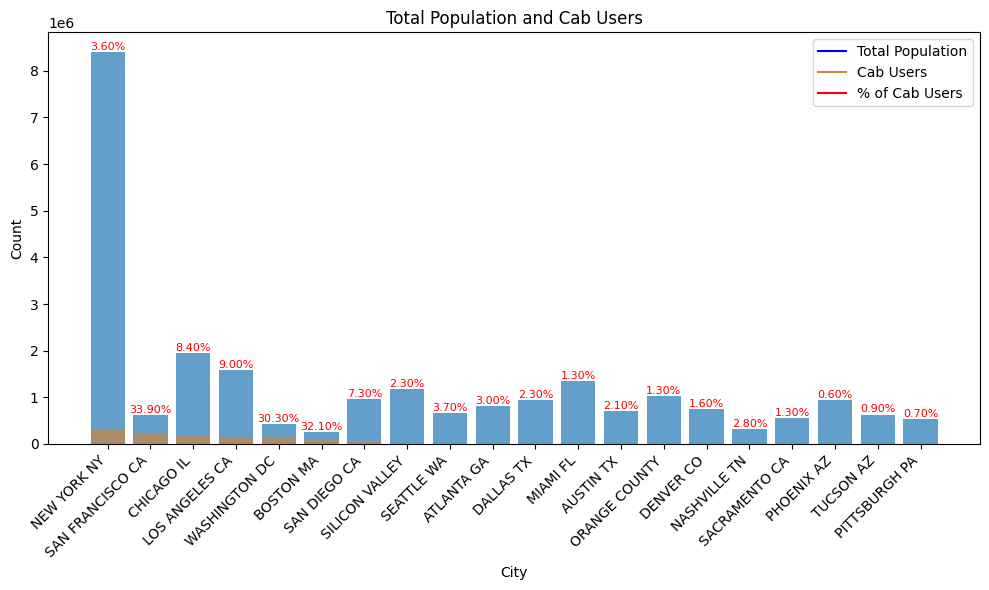

In [14]:
# Sort the DataFrame by "Users" in descending order to display the top cities by users
city_sorted = city.sort_values(by='Users', ascending=False)

# Create a vertical bar plot
plt.figure(figsize=(10, 6))

# Create bars for Population and Users
population_bars = plt.bar(city_sorted['City'], city_sorted['Population'], label='Total Population', alpha=0.7)
user_bars = plt.bar(city_sorted['City'], city_sorted['Users'], label='Total Users', alpha=0.7, color='peru')

# Plot percentage of cab users on top of each User bar
for i, percentage in enumerate(city_sorted['% of Cab Users']):
    plt.text(i, population_bars[i].get_height() + 1000, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8, color='red')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Total Population and Cab Users')
plt.xticks(rotation=45, ha='right')

# Add legends for Total Population, Total Users, and % of Users
population_legend = plt.Line2D([0], [0], color='blue', label='Total Population')
users_legend = plt.Line2D([0], [0], color='peru', label='Cab Users')
percentage_legend = plt.Line2D([0], [0], color='red', label='% of Cab Users')
plt.legend(handles=[population_legend, users_legend, percentage_legend], loc='upper right')
plt.tight_layout()

# Display the vertical bar chart
plt.show()

In the above graph, we can see that the New York has the most no. of cab users followed by San Fransisco and Chicago.

Whereas, if we talk about the most users by percentage of population, San Fransisco is 1st followed by Boston and Washington DC.

In [15]:
cust_id = pd.read_csv("/content/drive/MyDrive/DG Internship/Week 2/DataSets-main/Customer_ID.csv")
cust_id.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [16]:
#looking at the data types and missing values
cust_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


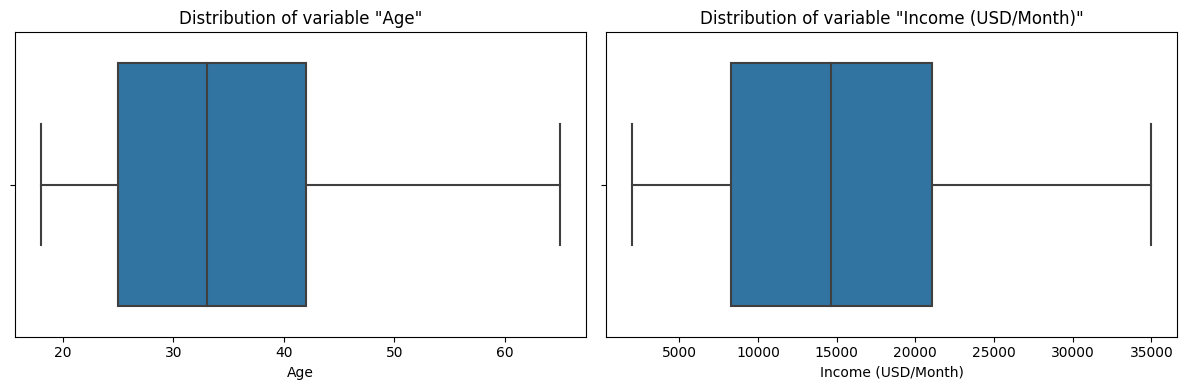

In [17]:
# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Create boxplots for each variable
sns.boxplot(x=cust_id['Age'], ax=axes[0])
sns.boxplot(x=cust_id['Income (USD/Month)'], ax=axes[1])

# Set plot titles
axes[0].set_title('Distribution of variable "Age"')
axes[1].set_title('Distribution of variable "Income (USD/Month)"')

# Display the plots
plt.tight_layout()
plt.show()

In [18]:
trans_id = pd.read_csv("/content/drive/MyDrive/DG Internship/Week 2/DataSets-main/Transaction_ID.csv")
trans_id.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [19]:
#looking at the data types and missing values
trans_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [20]:
print(cab_data["Transaction ID"].nunique(), trans_id["Transaction ID"].nunique())

359392 440098


As we can see above that there are some transaction ID's not present in "cab_data" dataset, but as it contains the most information, we will drop the extra transactions ID's while joining the datasets.

In [21]:
# merging all the datasets to create a master dataframe
df_merged = cab_data.merge(trans_id, on = "Transaction ID", how = 'left').merge(cust_id, on = "Customer ID", how = 'left').merge(city, on = 'City', how = 'left')
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,HighChargeFlag,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,% of Cab Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,0,29290,Card,Male,28,10813,814885,24701,3.0
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0,27703,Card,Male,27,9237,814885,24701,3.0
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632,0,28712,Cash,Male,53,11242,814885,24701,3.0
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0,28020,Cash,Male,23,23327,814885,24701,3.0
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776,0,27182,Card,Male,33,8536,814885,24701,3.0


In [22]:
# looking at the datatypes and missing values
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   HighChargeFlag      359392 non-null  int64         
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [23]:
# creating 2 new features, one stores net profir for each ride and the other stores the profit per KM for each ride
df_merged["Profit per Ride"] = df_merged["Price Charged"] - df_merged["Cost of Trip"]
df_merged["Profit/KM for the ride"] = df_merged["Profit per Ride"] / df_merged["KM Travelled"]
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,HighChargeFlag,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,% of Cab Users,Profit per Ride,Profit/KM for the ride
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,0,29290,Card,Male,28,10813,814885,24701,3.0,57.315,1.882266
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0,27703,Card,Male,27,9237,814885,24701,3.0,23.666,0.826904
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632,0,28712,Cash,Male,53,11242,814885,24701,3.0,27.568,3.049558
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0,28020,Cash,Male,23,23327,814885,24701,3.0,25.798,0.777751
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776,0,27182,Card,Male,33,8536,814885,24701,3.0,16.844,1.929439


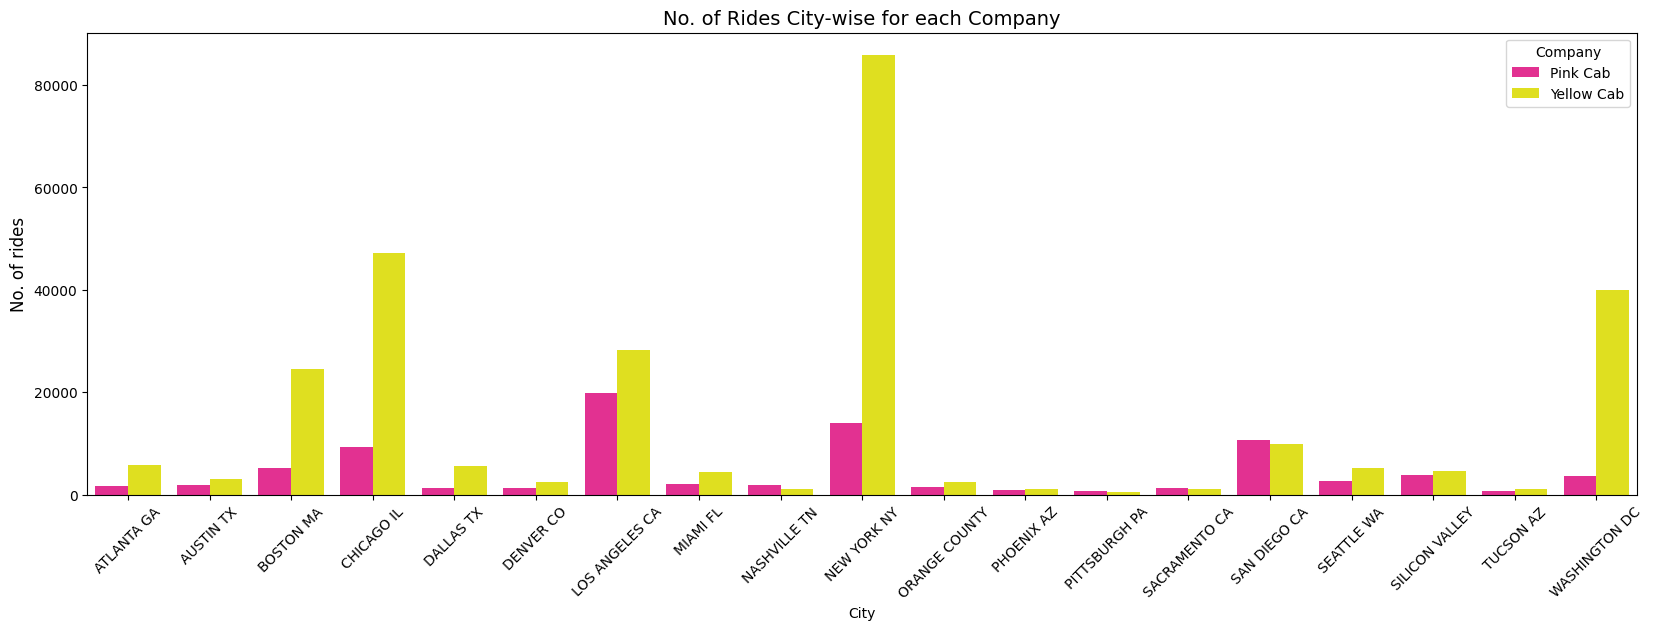

In [24]:
# Comparing no. of rides city wise for each company

# Create a custom color palette for Pink Cab and Yellow Cab
custom_palette = {'Pink Cab': 'deeppink', 'Yellow Cab': 'yellow'}

# Create a bar chart to compare the frequencies of Pink Cab and Yellow Cab with custom colors
plt.figure(figsize=(20, 6))
sns.countplot(data=df_merged, x='City', hue='Company', palette=custom_palette)
plt.ylabel("No. of rides", fontsize=12)
plt.xticks(rotation=45)
plt.title("No. of Rides City-wise for each Company", fontsize=14)
plt.show()

In [25]:
# creating a new feature which only takes into account the year of the cab ride
df_merged["Year"] = df_merged["Date of Travel"].dt.year
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,HighChargeFlag,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,% of Cab Users,Profit per Ride,Profit/KM for the ride,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,0,29290,Card,Male,28,10813,814885,24701,3.0,57.315,1.882266,2016
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0,27703,Card,Male,27,9237,814885,24701,3.0,23.666,0.826904,2016
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632,0,28712,Cash,Male,53,11242,814885,24701,3.0,27.568,3.049558,2016
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0,28020,Cash,Male,23,23327,814885,24701,3.0,25.798,0.777751,2016
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776,0,27182,Card,Male,33,8536,814885,24701,3.0,16.844,1.929439,2016


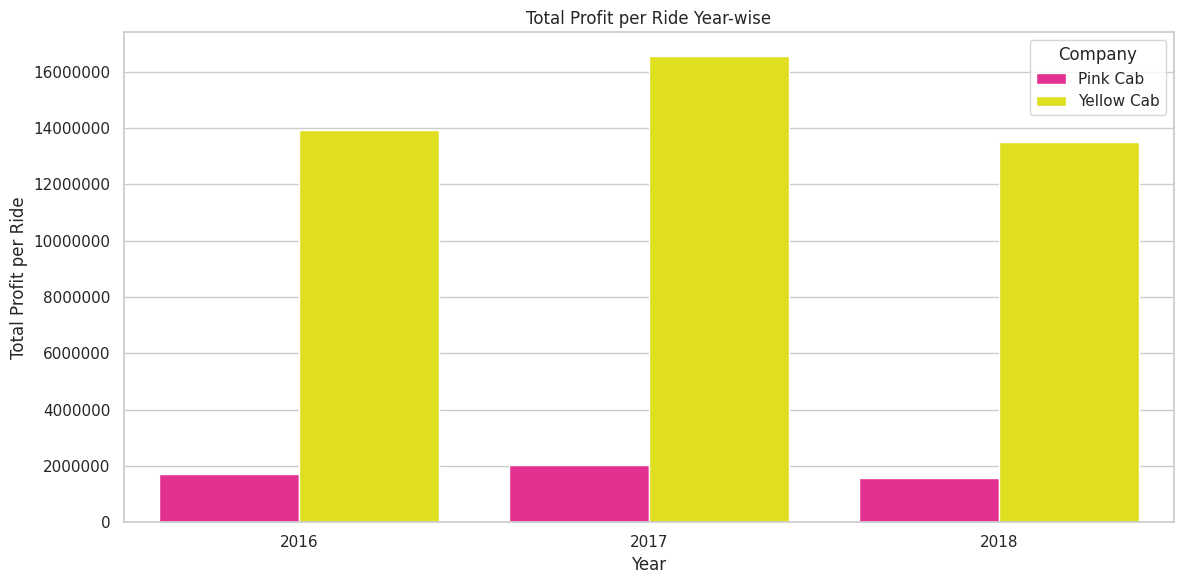

In [26]:
from matplotlib.ticker import ScalarFormatter

# Define a custom color palette for Pink Cab and Yellow Cab
cab_colors = {'Pink Cab': 'deeppink', 'Yellow Cab': 'yellow'}

# Pivot the DataFrame to calculate profit year-wise for each cab
profit_pivot = df_merged.pivot_table(values='Profit per Ride', index=["Company", "Year"], aggfunc='sum')

# Reset the index to make it easier to plot
profit_pivot = profit_pivot.reset_index()

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create a bar plot with colors according to cab color
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_pivot, x="Year", y="Profit per Ride", hue="Company", palette=cab_colors)
plt.xlabel('Year')
plt.ylabel('Total Profit per Ride')
plt.title('Total Profit per Ride Year-wise')
plt.legend(title='Company')

# Set the y-axis ticks to display full values instead of scientific notation
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

# Display the bar plot
plt.tight_layout()
plt.show()

In the above bar plot, we can clearly see that Total profit for the yellow cabs is multiple times more than pink cabs in all 3 years.

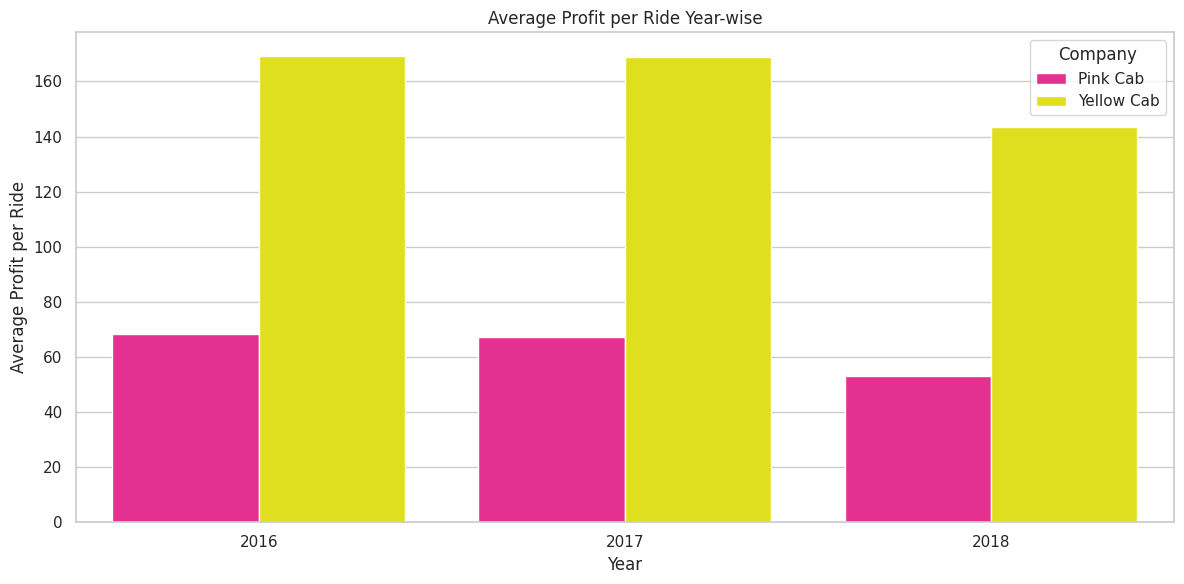

In [27]:
# Define a custom color palette for Pink Cab and Yellow Cab
cab_colors = {'Pink Cab': 'deeppink', 'Yellow Cab': 'yellow'}

# Pivot the DataFrame to calculate profit year-wise for each cab
profit_pivot = df_merged.pivot_table(values='Profit per Ride', index=["Company", "Year"], aggfunc='mean')

# Reset the index to make it easier to plot
profit_pivot = profit_pivot.reset_index()

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create a bar plot with colors according to cab color
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_pivot, x="Year", y="Profit per Ride", hue="Company", palette=cab_colors)
plt.xlabel('Year')
plt.ylabel('Average Profit per Ride')
plt.title('Average Profit per Ride Year-wise')
plt.legend(title='Company')

# Set the y-axis ticks to display full values instead of scientific notation
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

# Display the bar plot
plt.tight_layout()
plt.show()

In the above barplot we can clearly see that Average Profit per Ride for Yellow Cabs is more than twice the Average Profit per Ride for Pink Cabs for all the years.

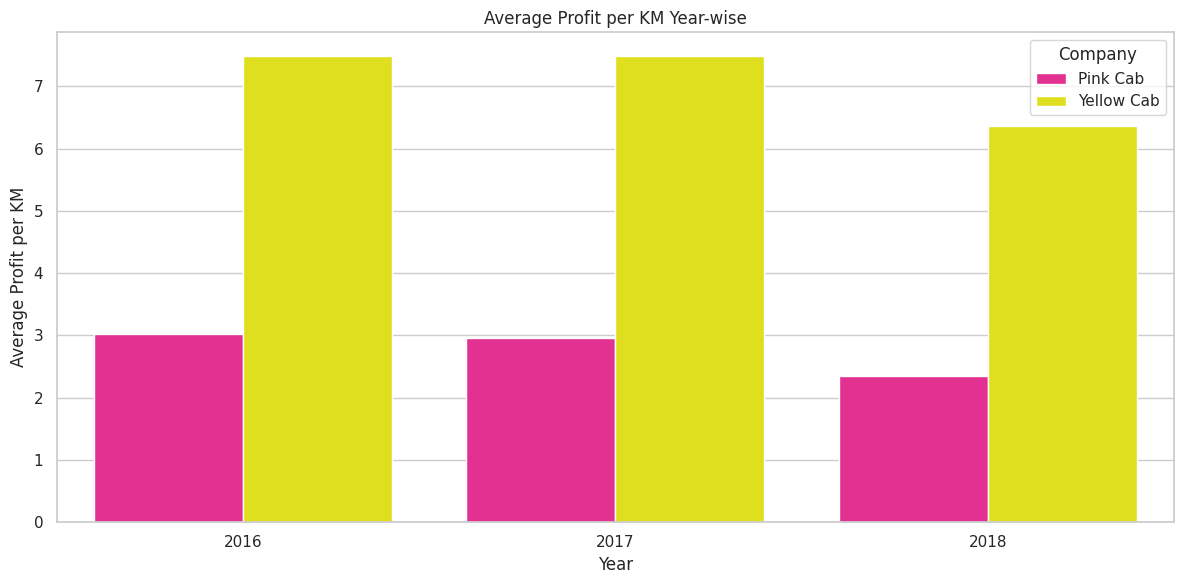

In [28]:
# Define a custom color palette for Pink Cab and Yellow Cab
cab_colors = {'Pink Cab': 'deeppink', 'Yellow Cab': 'yellow'}

# Pivot the DataFrame to calculate profit year-wise for each cab
profit_pivot = df_merged.pivot_table(values='Profit/KM for the ride', index=["Company", "Year"], aggfunc='mean')

# Reset the index to make it easier to plot
profit_pivot = profit_pivot.reset_index()

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create a bar plot with colors according to cab color
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_pivot, x="Year", y="Profit/KM for the ride", hue="Company", palette=cab_colors)
plt.xlabel('Year')
plt.ylabel('Average Profit per KM')
plt.title('Average Profit per KM Year-wise')
plt.legend(title='Company')

# Set the y-axis ticks to display full values instead of scientific notation
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

# Display the bar plot
plt.tight_layout()
plt.show()

In the above bar plot, we can see that the Average profit per KM for Yellow cabs is a lot higher than Pink Cabs.

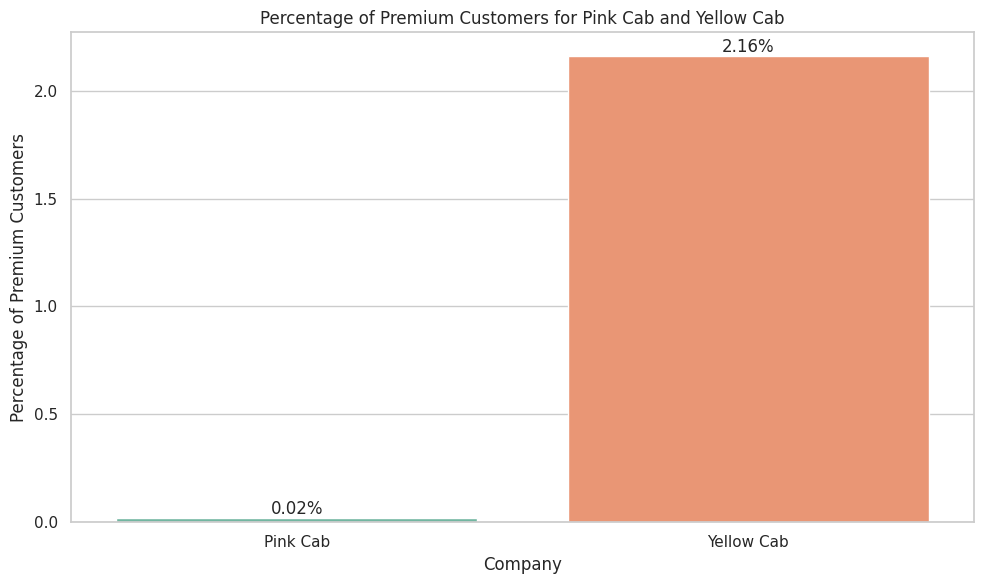

In [29]:
# Now take a look at the premium customers
# Filter the DataFrame to include only premium customers
premium_df = df_merged[df_merged['HighChargeFlag'] == 1]

# Calculate the percentage of premium customers for each cab company
percentage_premium = premium_df.groupby('Company').size() / df_merged.groupby('Company').size() * 100

# Create a bar plot to show the percentage of premium customers for each cab company
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_premium.index, y=percentage_premium.values, palette='Set2')
plt.xlabel('Company')
plt.ylabel('Percentage of Premium Customers')
plt.title('Percentage of Premium Customers for Pink Cab and Yellow Cab')

# Display the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the bar plot
plt.tight_layout()
plt.show()

In the above graph, we can see that 2.16% of Yellow Cab users are premium users and 0.02% of Pink Cab users are premium users.

**We are assuming Premium Users as someone who either use premium rides, or rides for long distances, or uses overnight cab rides.

In [30]:
df_merged['Month'] = df_merged["Date of Travel"].dt.month
df_merged['Day'] = df_merged["Date of Travel"].dt.dayofweek
df_merged['Year-Month'] = df_merged['Date of Travel'].dt.to_period('M')
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,HighChargeFlag,Customer ID,Payment_Mode,...,Income (USD/Month),Population,Users,% of Cab Users,Profit per Ride,Profit/KM for the ride,Year,Month,Day,Year-Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,0,29290,Card,...,10813,814885,24701,3.0,57.315,1.882266,2016,1,4,2016-01
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0,27703,Card,...,9237,814885,24701,3.0,23.666,0.826904,2016,1,5,2016-01
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632,0,28712,Cash,...,11242,814885,24701,3.0,27.568,3.049558,2016,1,6,2016-01
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0,28020,Cash,...,23327,814885,24701,3.0,25.798,0.777751,2016,1,0,2016-01
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776,0,27182,Card,...,8536,814885,24701,3.0,16.844,1.929439,2016,1,1,2016-01


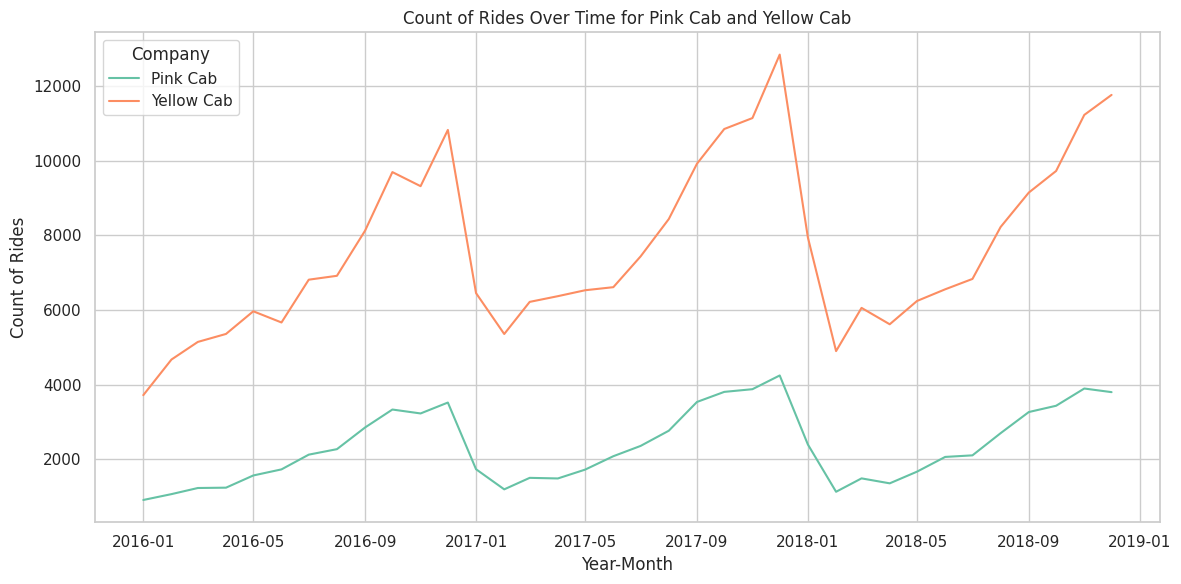

In [31]:
# Group and aggregate the data to calculate the count of rides for each cab company over time
rides_count = df_merged.groupby(['Year-Month', 'Company']).size().reset_index(name='Rides Count')
rides_count['Year-Month'] = rides_count['Year-Month'].dt.to_timestamp()

# Create a line plot to show the count of rides over time for each company
plt.figure(figsize=(12, 6))
sns.lineplot(data=rides_count, x='Year-Month', y='Rides Count', hue='Company', palette='Set2')
plt.xlabel('Year-Month')
plt.ylabel('Count of Rides')
plt.title('Count of Rides Over Time for Pink Cab and Yellow Cab')
plt.legend(title='Company')

# Display the line plot
plt.tight_layout()
plt.show()

When we look at the no. of rides over time for both the companies, we can see that there is a specific pattern of seasonality. As we approach near the end of each year, the rides count keep on increasing and as we reach the new year it starts to decline and gets to the minimum rides count.

If we take a closer look, we can say that around July-August people start to take more rides and this keeps on increasing till the new year.

Although, the pattern of seasonality almost looks similar in both companies, but if we look closely, even the worst season of yellow cabs have similar rides to the best season of pink cabs. This indicates how well they are doing.

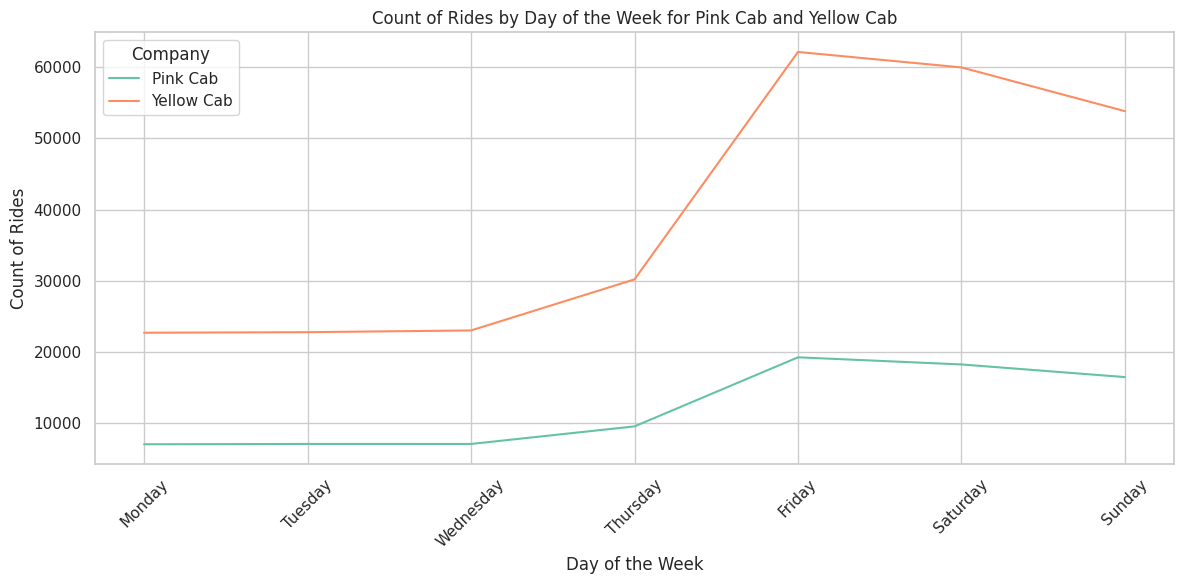

In [32]:
# Group and aggregate the data to calculate the count of rides for each cab company by day of the week
rides_by_day = df_merged.groupby(['Day', 'Company']).size().reset_index(name='Rides Count')

# Create a line plot to show the count of rides by day of the week for each company
plt.figure(figsize=(12, 6))
sns.lineplot(data=rides_by_day, x='Day', y='Rides Count', hue='Company', palette='Set2')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Rides')
plt.title('Count of Rides by Day of the Week for Pink Cab and Yellow Cab')
plt.legend(title='Company')

# Customize the x-axis labels to show the day names
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(range(7), days, rotation=45)

# Display the line plot
plt.tight_layout()
plt.show()

From the above graph we can see that there are more rides at the end of the week. As we move towards the weekend, rides count increases, its highest on Friday's, followed by Saturday's and then Sunday's. It could be that people may go to enjoy there weekends after their working hours on Fridays and travel to places of leisure, family and friends and return to their homes on Sunday.

It is also visible that the no. of rides for yellow cabs increases much more than the pink cabs during weekend. This shows us what more people prefer as their go-to ride cabs.

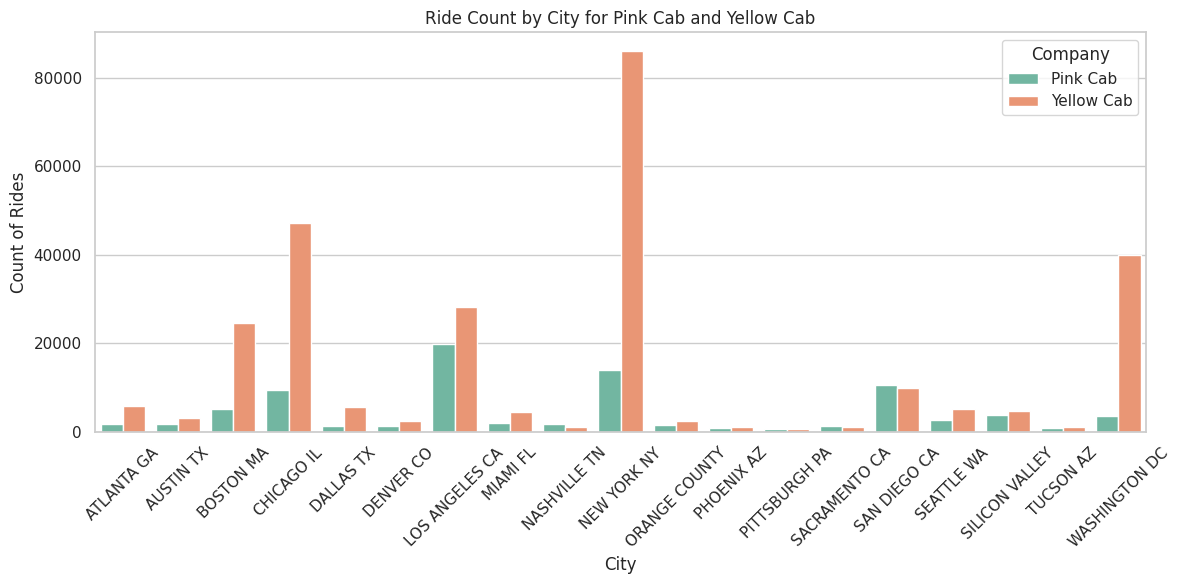

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and aggregate the data to calculate the count of rides for each cab company by city
rides_by_city = df_merged.groupby(['City', 'Company']).size().reset_index(name='Rides Count')

# Create a bar plot to show the ride count by city for each company
plt.figure(figsize=(12, 6))
sns.barplot(data=rides_by_city, x='City', y='Rides Count', hue='Company', palette='Set2')
plt.xlabel('City')
plt.ylabel('Count of Rides')
plt.title('Ride Count by City for Pink Cab and Yellow Cab')
plt.legend(title='Company')

# Customize the x-axis labels
plt.xticks(rotation=45)

# Display the bar plot
plt.tight_layout()
plt.show()

We can see that the big cities such as Boston, Chicago, Los Angeles, New York, Washington DC have higher no. of Yellow Cab users. This shows that in the big cities Yellow cab is definitely the preferable option.

In other cities such as Nashville, Sacramento, San Diego, Pink Cabs are more popular. From the graph above where we compared cabs based on the percentage of premium customers, we could see much more premium customers in Yellow cabs and here we can see that the bigger cities prefer yellow cabs, makes sense now.

Also, if we look at the average profit per km comparision between coth companies, we can clearly see that Yellow cabs generally make more than twice the profit, indicating their rides are generally costlier.

In [34]:
df_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,HighChargeFlag,Customer ID,Payment_Mode,...,Income (USD/Month),Population,Users,% of Cab Users,Profit per Ride,Profit/KM for the ride,Year,Month,Day,Year-Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,0,29290,Card,...,10813,814885,24701,3.0,57.315,1.882266,2016,1,4,2016-01
1,10000012,2016-01-09,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0,27703,Card,...,9237,814885,24701,3.0,23.666,0.826904,2016,1,5,2016-01
2,10000013,2016-01-10,Pink Cab,ATLANTA GA,9.04,125.20,97.632,0,28712,Cash,...,11242,814885,24701,3.0,27.568,3.049558,2016,1,6,2016-01
3,10000014,2016-01-11,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0,28020,Cash,...,23327,814885,24701,3.0,25.798,0.777751,2016,1,0,2016-01
4,10000015,2016-01-12,Pink Cab,ATLANTA GA,8.73,114.62,97.776,0,27182,Card,...,8536,814885,24701,3.0,16.844,1.929439,2016,1,1,2016-01


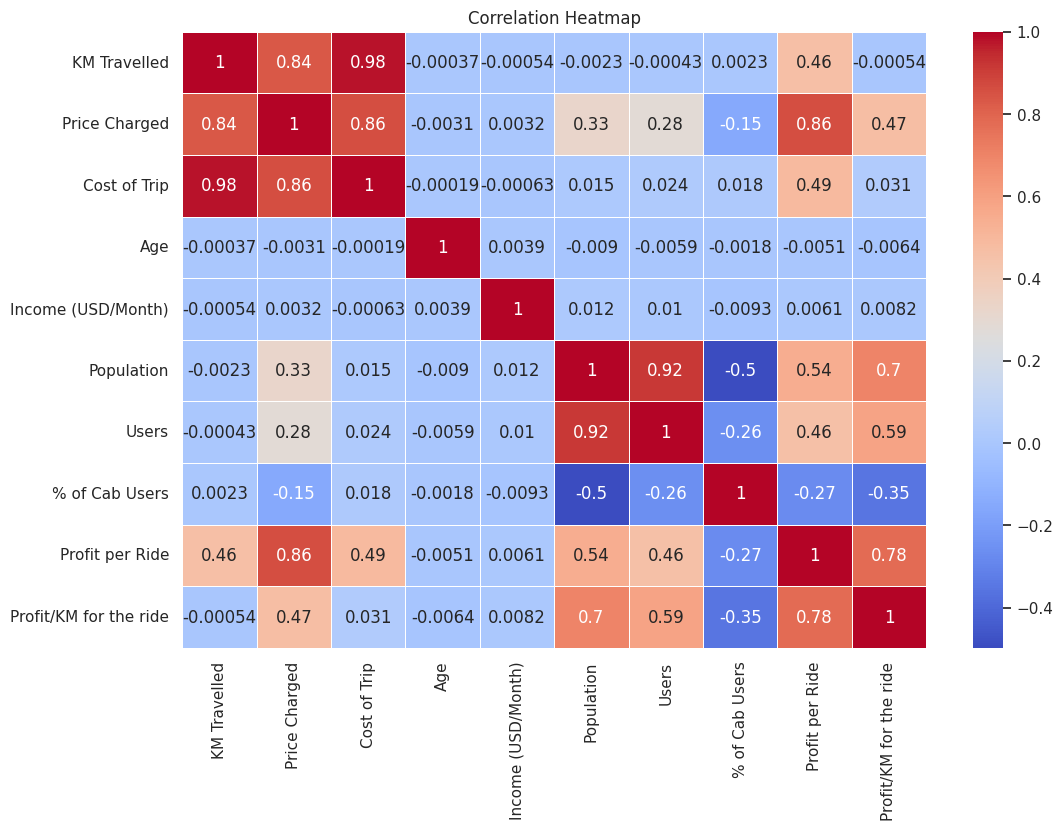

In [35]:
# Select the columns you want in the heatmap
selected_columns = ['KM Travelled','Price Charged', 'Cost of Trip','Age', 'Income (USD/Month)', 'Population',
                    'Users', '% of Cab Users', 'Profit per Ride', 'Profit/KM for the ride']

# Create a correlation matrix for the selected columns
correlation_matrix = df_merged[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

If we look at the heatmap above, we can see that there is a high correlation(>0.45 or less than -0.45) between:

1. Price Charged and KM Travelled
2. Cost of Trip and KM Travelled
3. Cost of Trip and Price Charged
4. Users and Population
5. Profit per Ride and KM Travelled
6. Profit per Ride and Price Charged
7. Price Charged and Cost of Trip
8. Profit per Ride and Population
9. Profit per Ride and Users
10. Profit/KM for the ride and Price Charged
11. Profit/KM for the ride and Population
12. Profit/KM for the ride and Users
13. Profit/KM for the ride and Profit per Ride
14. % of Cab Users and Population

<ipython-input-36-aface629cb21>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_merged, x='Company', y='Profit per Ride', hue='Distance Category', ci=None, palette='Set2')


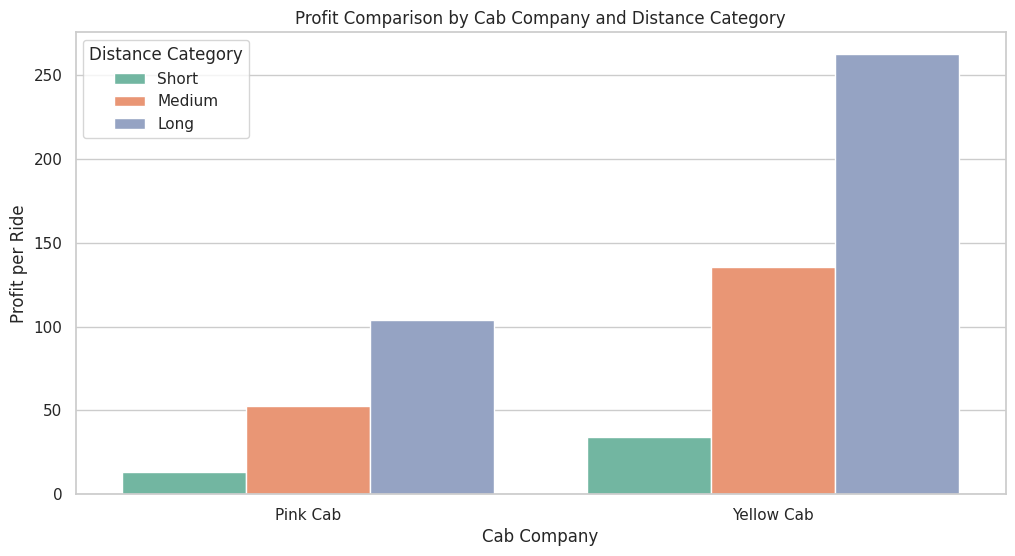

In [36]:
# Define distance thresholds
short_distance_threshold = 8
medium_distance_threshold = 30

# Categorize trips based on distance
df_merged['Distance Category'] = pd.cut(df_merged['KM Travelled'],
                                        bins=[0, short_distance_threshold, medium_distance_threshold, df_merged['KM Travelled'].max()],
                                        labels=['Short', 'Medium', 'Long'])

# Create a bar chart to compare profit between cab companies and distance categories
plt.figure(figsize=(12, 6))
sns.barplot(data=df_merged, x='Company', y='Profit per Ride', hue='Distance Category', ci=None, palette='Set2')

# Set the title and labels
plt.title('Profit Comparison by Cab Company and Distance Category')
plt.xlabel('Cab Company')
plt.ylabel('Profit per Ride')

# Display the chart
plt.show()

From the above graph we can clearly see that the shorter the trip is, the less is the profit. As the trip distance increases the profit also increases.

If we look at the Long distance trips, there is a huge difference in the profits of Pink Cab and Yellow Cab.

As always we can see that Yellow Cab is more profitable in the short distance trips as compared to the Pink Cabs, and as the distance increases, the proportion of profits increases even more.

**We have assumed that a trip upto 8km is short distance trip, a trip from 8km to 30km is Medium distance trip, and a trip above 30km is a long distance trip.

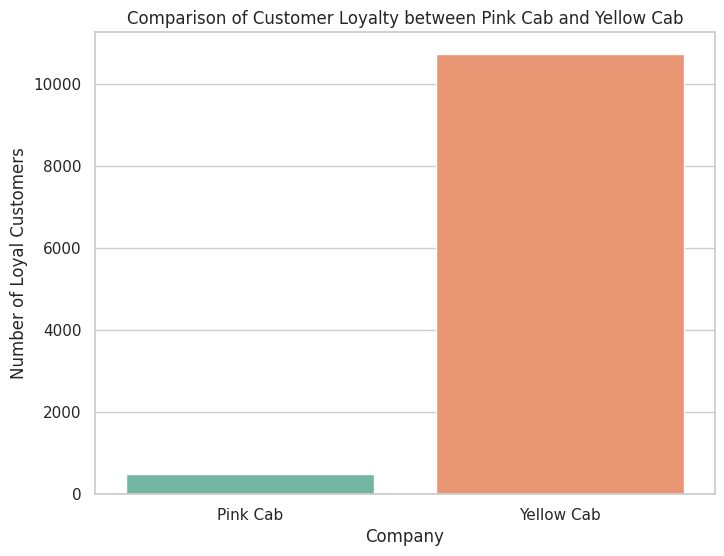

In [37]:
# Group by 'Customer ID' and 'Company' to count unique rides
loyalty_counts = df_merged.groupby(['Customer ID', 'Company']).size().reset_index(name='Ride Count')

# Identify loyal customers (repeating customers)
loyalty_counts['Loyal'] = loyalty_counts['Ride Count'] > 9

# Filter loyal customers for Pink Cab and Yellow Cab
loyal_customers_pink = loyalty_counts[(loyalty_counts['Company'] == 'Pink Cab') & loyalty_counts['Loyal']]
loyal_customers_yellow = loyalty_counts[(loyalty_counts['Company'] == 'Yellow Cab') & loyalty_counts['Loyal']]

# Count the number of loyal customers for each company
loyal_customers_count_pink = len(loyal_customers_pink)
loyal_customers_count_yellow = len(loyal_customers_yellow)

# Create a bar plot to compare customer loyalty
plt.figure(figsize=(8, 6))
sns.barplot(x=['Pink Cab', 'Yellow Cab'], y=[loyal_customers_count_pink, loyal_customers_count_yellow], palette='Set2')
plt.xlabel('Company')
plt.ylabel('Number of Loyal Customers')
plt.title('Comparison of Customer Loyalty between Pink Cab and Yellow Cab')
plt.show()

In the above graph, we have assumed that any customer who uses the same cab service atleast every 4 months on average is a loyal customer to that cab service.

Here, we have this data for almost 36 months, so we have assumed that any customer who uses a particular company cab atleast 9 times will be called as Loyal Customer.

As expected, we can see that eventhough yellow cabs are have costlier rides, still they have far more loyal customers as compared to the pink cabs.

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Transaction ID          359392 non-null  int64         
 1   Date of Travel          359392 non-null  datetime64[ns]
 2   Company                 359392 non-null  object        
 3   City                    359392 non-null  object        
 4   KM Travelled            359392 non-null  float64       
 5   Price Charged           359392 non-null  float64       
 6   Cost of Trip            359392 non-null  float64       
 7   HighChargeFlag          359392 non-null  int64         
 8   Customer ID             359392 non-null  int64         
 9   Payment_Mode            359392 non-null  object        
 10  Gender                  359392 non-null  object        
 11  Age                     359392 non-null  int64         
 12  Income (USD/Month)      359392

Hypothesis:

1) Which  company has more yearwise profit?

2) Which company has more premium users?

3) Is there any seasonality in number of customers using the cab service over the year?

4) Is there any seasonality in number of customers using the cab service over a week?

5) Which company has more profits by different distance categories?

6) Which company has more loyal customers?